<a href="https://colab.research.google.com/github/DarkSchneider/Exercises/blob/main/Traccia_progettoF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informazioni consegna
* Aggiungere i componenti del proprio gruppo in questo [form](https://forms.office.com/r/1WKBx4YgSH). 
* **I gruppi possono essere composti da massimo 3 persone. Nel caso si intenda fare il progetto da soli bisogna comunque aggiungere il proprio nome nel form.**
* Per la consegna è necessario caricare su Virtuale la relazione, il notebook Colab e le immagini generate.
* La consegna deve essere effettuata da un qualsiasi membro del gruppo e verrà automaticamente attribuita ai restanti componenti.
* Per i dettagli sulle tempistiche e le scadenze si faccia riferimento a Virtuale.

# Deblur Immagini
Il problema di deblur consiste nella ricostruzione di un immagine a partire da un dato acquisito mediante il seguente modello:

\begin{align*}
    b = A x + \eta
\end{align*}

dove $b$ rappresenta l'immagine corrotta, $x$ l'immagine originale che vogliamo ricostruire, $A$ l'operatore che applica il blur Gaussiano ed $\eta$ il rumore additivo con distribuzione Gaussiana di  media $\mathbb{0}$ e deviazione standard $\sigma$.

## Funzioni di blur
Le seguenti funzioni servono per applicare il blur di tipo gaussiano ad un'immagine.



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, metrics
from scipy import signal
from numpy import fft

# Create a Gaussian kernel of size kernlen and standard deviation sigma
def gaussian_kernel(kernlen, sigma):
    x = np.linspace(- (kernlen // 2), kernlen // 2, kernlen)    
    # Unidimensional Gaussian kernel
    kern1d = np.exp(- 0.5 * (x**2 / sigma))
    # Bidimensional Gaussian kernel
    kern2d = np.outer(kern1d, kern1d)
    # Normalization
    return kern2d / kern2d.sum()

# Compute the FFT of the kernel 'K' of size 'd' padding with the zeros necessary
# to match the size of 'shape'
def psf_fft(K, d, shape):
    # Zero padding
    K_p = np.zeros(shape)
    K_p[:d, :d] = K

    # Shift
    p = d // 2
    K_pr = np.roll(np.roll(K_p, -p, 0), -p, 1)

    # Compute FFT
    K_otf = fft.fft2(K_pr)
    return K_otf

# Multiplication by A
def A(x, K):
  x = fft.fft2(x)
  return np.real(fft.ifft2(K * x))

# Multiplication by A transpose
def AT(x, K):
  x = fft.fft2(x)
  return np.real(fft.ifft2(np.conj(K) * x))

#funzione per trovare i pollici partendo da pixel
def pixel2inch(num,dpi):
  return num/dpi

## Generazione dataset
Generare un set di 8 immagini 512$\times$512 in formato ${\tt png}$ in scala dei grigi che contengano tra i 2 ed i 6 oggetti geometrici, di colore uniforme, su sfondo nero. 


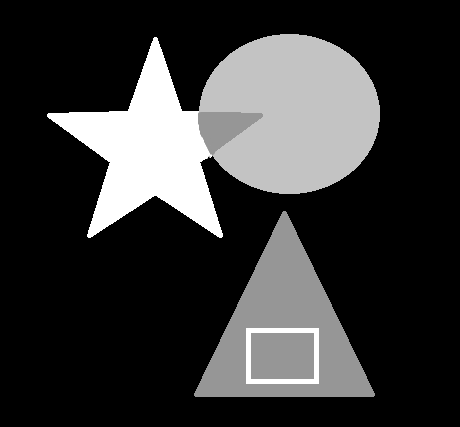


## 1) Generazione immagini corrotte
Degradare le immagini applicando, mediante le funzioni riportate nella cella precedente,  l'operatore di blur con parametri

+ $\sigma=0.5$ dimensione $5\times 5$
+ $\sigma=1$ dimensione $7\times 7$
+ $\sigma=1.3$ dimensione $9\times 9$

ed aggiungendo rumore gaussiano con deviazione standard $(0,0.05]$

PSNR immagine-0 con imblur1: 27.11286507425445
MSE immagine-0 con imblur1: 0.0019440771357764615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-1 con imblur1: 27.42465152452543
MSE immagine-1 con imblur1: 0.0018094010897653338


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-2 con imblur1: 27.671509554454484
MSE immagine-2 con imblur1: 0.001709421037987799


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-3 con imblur1: 27.745977131352547
MSE immagine-3 con imblur1: 0.001680359814300033


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-4 con imblur1: 27.839603376516287
MSE immagine-4 con imblur1: 0.0016445219038528824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-5 con imblur1: 27.392910549437467
MSE immagine-5 con imblur1: 0.0018226737756330516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-6 con imblur1: 27.54047434934546
MSE immagine-6 con imblur1: 0.0017617836086586836


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-7 con imblur1: 27.562719048075472
MSE immagine-7 con imblur1: 0.0017527827690701108


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

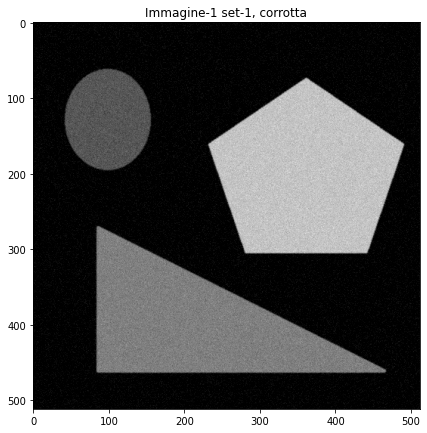

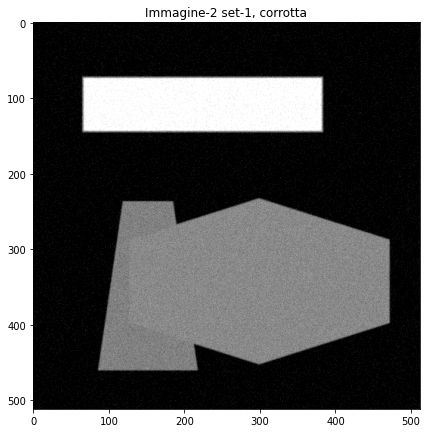

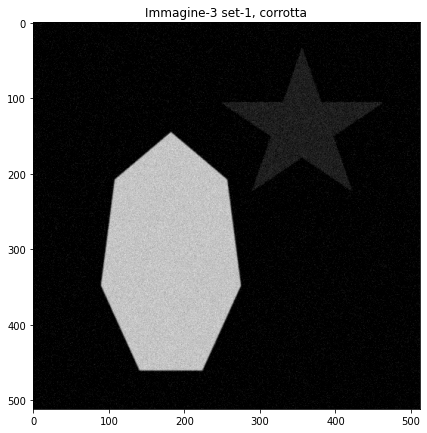

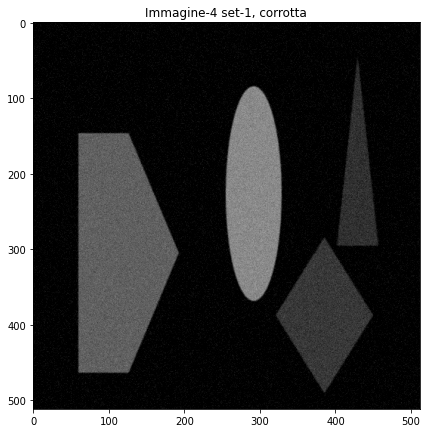

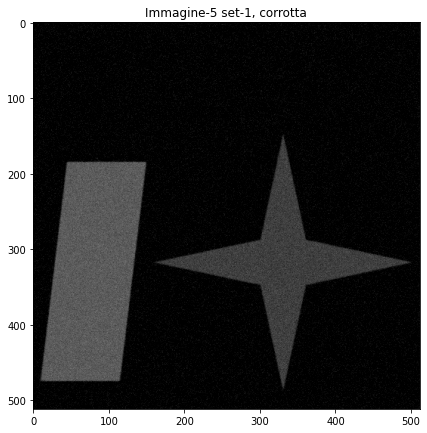

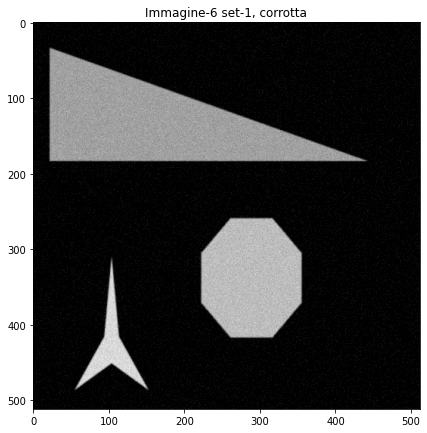

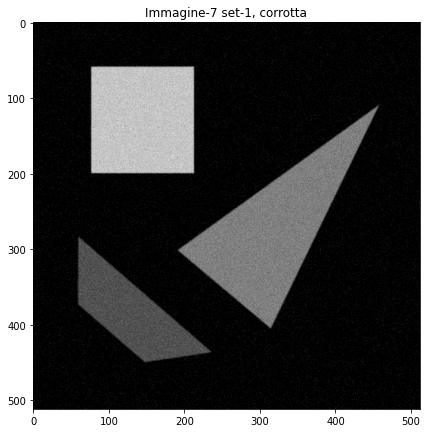

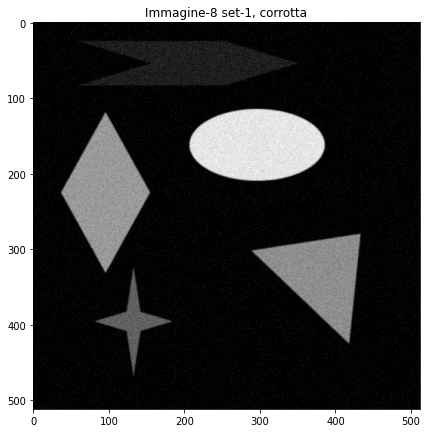

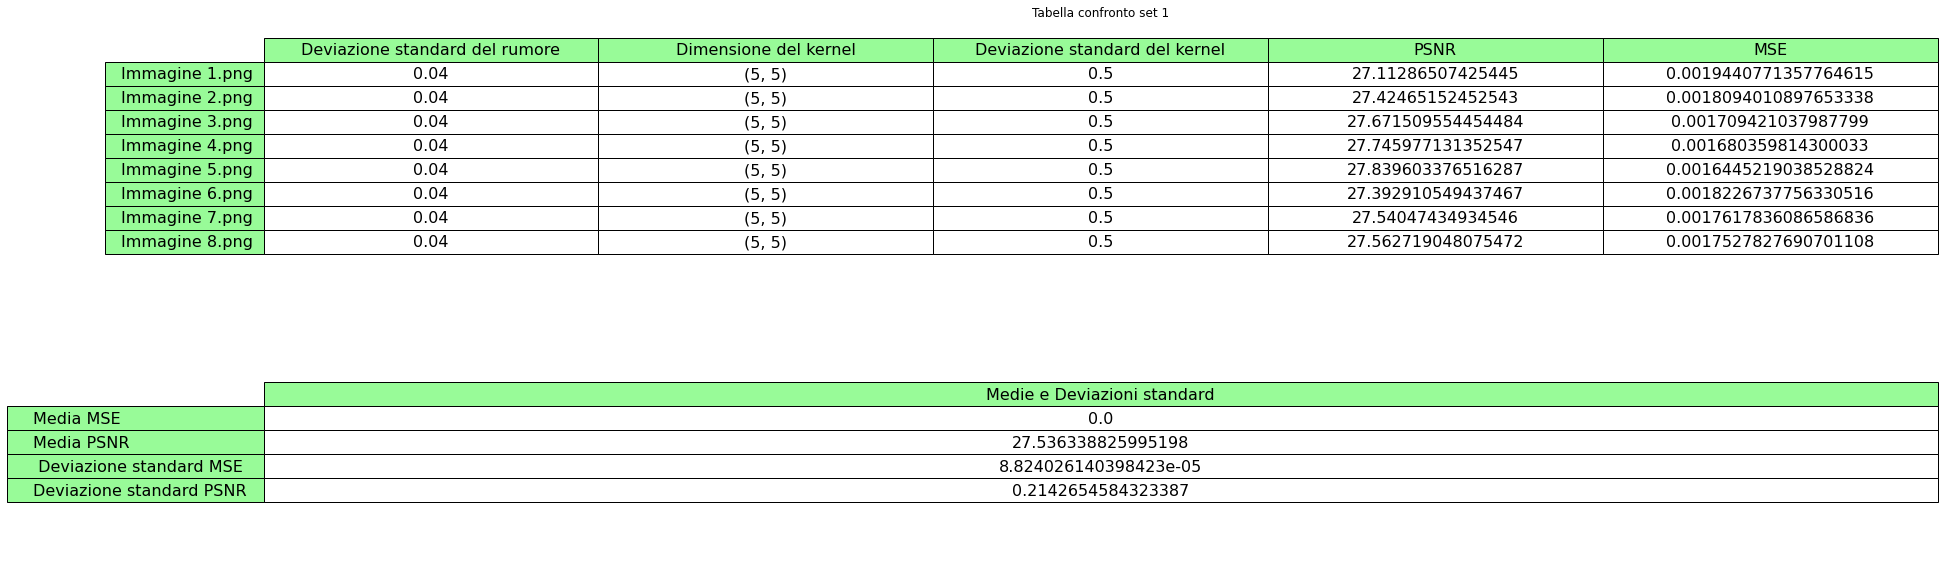

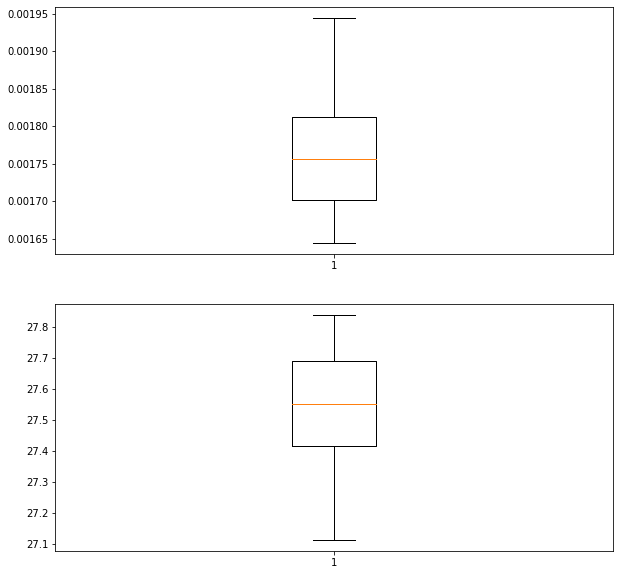

In [6]:
import matplotlib.pyplot as plt
from skimage import color, io, metrics
import sys
from google.colab import files
import matplotlib


#lettura delle immagini e renderle in colormap bianco e nero
immagini=[]
for i in range(8):
  immagini.append(np.array(color.rgb2gray(plt.imread('{}.png'.format(i+1))), dtype=np.float64))

#aggiungere il blur
k1 = gaussian_kernel(5,0.5)
k2 = gaussian_kernel(7,1)
k3 = gaussian_kernel(9,1.3)

dim = immagini[i].shape

#filtro di blur
f1 = psf_fft(k1, 5, dim)
f2 = psf_fft(k2, 7, dim)
f3 = psf_fft(k3, 9, dim)


#rumore
sigma = 0.04

#moltiplicare tutto
imblur1 = []
imblur2 = []
imblur3 = []

data = []
data2 = []
MSE_corrotta = []
PSNR_corrotta = []
sum_MSE = 0
sum_PSNR = 0
for i in range(8):
    noise = np.random.normal(size=dim) * sigma
    imblur1.append(np.array(A(immagini[i], f1) + noise))
    '''
    imblur2.append(np.array(A(immagini[i], f2) + noise))
    imblur3.append(np.array(A(immagini[i], f3) + noise))
    '''
    ###da cambiare <<-------------------------------------------------
    x = imblur1[i]
    placeholder = "1"

    #calcolare psnr e mse tra (immagini, imblur)
    PSNR_corrotta.append(metrics.peak_signal_noise_ratio(immagini[i], x))
    MSE_corrotta.append(metrics.mean_squared_error(immagini[i], x))
    print('PSNR immagine-{} con imblur1: {}'.format(i,PSNR_corrotta[i]))
    print('MSE immagine-{} con imblur1: {}'.format(i,MSE_corrotta[i]))
    data.append([sigma, k1.shape, 0.5, PSNR_corrotta[i], MSE_corrotta[i]])

    #salvare le immagini
    plt.figure(figsize=(pixel2inch(512,72),pixel2inch(512,72))) #72dpi
    ax = plt.subplot()
    ax.imshow(x, cmap='gray', vmin=0, vmax=1)
    plt.title('Immagine-{} set-{}, corrotta'.format(str(i+1), str(placeholder)))
    plt.imsave('Immagine-{} set-{}, corrotta.png'.format(str(i+1), str(placeholder)), x, cmap=plt.cm.gray, vmin=0, vmax=1)
    files.download('Immagine-{} set-{}, corrotta.png'.format(str(i+1), str(placeholder)))
    sum_PSNR = PSNR_corrotta[i]  + sum_PSNR

media_MSE_corrotta = sum_MSE / 8
media_PSNR_corrotta = sum_PSNR / 8
dev_MSE_corrotta = np.std(MSE_corrotta)
dev_PSNR_corrotta = np.std(PSNR_corrotta)
data2.append([media_MSE_corrotta])
data2.append([media_PSNR_corrotta])
data2.append([dev_MSE_corrotta])
data2.append([dev_PSNR_corrotta])
headers=["Deviazione standard del rumore", "Dimensione del kernel", "Deviazione standard del kernel", "PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", " Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()

fig, (ax1, ax2) = plt.subplots(2, figsize= (10,10))
ax1.boxplot(MSE_corrotta, 0, "")
ax2.boxplot(PSNR_corrotta, 0, "")
plt.show()


## 2) Soluzione naive

Una possibile ricostruzione dell'immagine originale $x$ partendo dall'immagine corrotta $b$ è la soluzione naive data dal minimo del seguente problema di ottimizzazione:
\begin{align}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2
\end{align}

La funzione $f$ da minimizzare è data dalla formula
  $f(x) = \frac{1}{2} ||Ax - b||_2^2 $, il cui gradiente $\nabla f$ è dato da
$\nabla f(x) = A^TAx - A^Tb  $.

Utilizzando il metodo del gradiente coniugato implementato dalla funzione `minimize` calcolare la soluzione naive. 

         Current function value: 0.253979
         Iterations: 50
         Function evaluations: 104
         Gradient evaluations: 104
     fun: 0.25397893580888586
     jac: array([-2.22350174e-04,  2.57607796e-06, -1.07280097e-04, ...,
       -2.80565638e-04,  2.09512914e-04,  2.46845679e-05])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 104
     nit: 50
    njev: 104
  status: 1
 success: False
       x: array([ 0.13652068, -0.27412255,  0.14987837, ..., -0.14055951,
        0.02500956,  0.05786337])
PSNR immagine-0 con imblur1: 9.074523597480761
MSE immagine-0 con imblur1: 0.12375069317211584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.247589
         Iterations: 50
         Function evaluations: 104
         Gradient evaluations: 104
     fun: 0.2475893762167467
     jac: array([-7.95382293e-05, -2.78760368e-05, -2.82203183e-05, ...,
       -2.69259144e-04, -2.33830281e-04, -1.20785520e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 104
     nit: 50
    njev: 104
  status: 1
 success: False
       x: array([ 0.27052017, -0.46258939,  0.32594995, ...,  0.14822552,
        0.2778609 , -0.02844221])
PSNR immagine-1 con imblur1: 9.09782701061414
MSE immagine-1 con imblur1: 0.12308844889508473


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.246813
         Iterations: 50
         Function evaluations: 104
         Gradient evaluations: 104
     fun: 0.24681341833351836
     jac: array([ 2.82188467e-04, -7.90847810e-05,  8.45617250e-05, ...,
        2.69875928e-04,  2.86388091e-04,  2.01065043e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 104
     nit: 50
    njev: 104
  status: 1
 success: False
       x: array([-0.11883834, -0.20039618,  0.41827488, ..., -0.40270389,
        0.6242176 , -0.68806482])
PSNR immagine-2 con imblur1: 9.052186526184265
MSE immagine-2 con imblur1: 0.12438881983568549


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.256837
         Iterations: 50
         Function evaluations: 102
         Gradient evaluations: 102
     fun: 0.256837030322671
     jac: array([ 1.55222955e-04, -1.06540250e-04, -7.74350443e-05, ...,
       -1.03221300e-05, -1.21460634e-05,  2.99308119e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 102
     nit: 50
    njev: 102
  status: 1
 success: False
       x: array([ 0.42897978,  0.1352642 , -0.01570929, ...,  0.56552678,
       -0.1728793 , -0.12593529])
PSNR immagine-3 con imblur1: 9.075922976834566
MSE immagine-3 con imblur1: 0.1237108247705469


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.242016
         Iterations: 50
         Function evaluations: 103
         Gradient evaluations: 103
     fun: 0.2420161727286935
     jac: array([ 1.53147117e-04,  7.64208963e-06, -1.11546433e-04, ...,
       -2.11330822e-04, -5.70378346e-05,  1.12604849e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 103
     nit: 50
    njev: 103
  status: 1
 success: False
       x: array([ 0.28168987, -0.29218885, -0.02301956, ...,  0.18851294,
       -0.0449513 ,  0.40980307])
PSNR immagine-4 con imblur1: 9.06098262291843
MSE immagine-4 con imblur1: 0.12413714064873174


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.368473
         Iterations: 50
         Function evaluations: 104
         Gradient evaluations: 104
     fun: 0.36847267070119805
     jac: array([-2.61944994e-04, -2.40532650e-04,  3.40811914e-05, ...,
        2.57815902e-05,  8.95549905e-05, -3.23057479e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 104
     nit: 50
    njev: 104
  status: 1
 success: False
       x: array([-0.2815425 ,  0.18865947, -0.38601802, ...,  0.17048084,
        0.22551705, -0.14582673])
PSNR immagine-5 con imblur1: 9.16815190135074
MSE immagine-5 con imblur1: 0.12111134016388458


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.265269
         Iterations: 50
         Function evaluations: 102
         Gradient evaluations: 102
     fun: 0.2652686013612163
     jac: array([ 1.88721990e-04,  1.04373652e-04, -9.61053662e-05, ...,
       -1.96716007e-04, -1.40984253e-04, -2.28053102e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 102
     nit: 50
    njev: 102
  status: 1
 success: False
       x: array([ 0.20568612, -0.06919165, -0.20586614, ..., -0.14429887,
       -0.17251535,  0.15793148])
PSNR immagine-6 con imblur1: 9.140074872932182
MSE immagine-6 con imblur1: 0.12189685835671704


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 0.268878
         Iterations: 50
         Function evaluations: 102
         Gradient evaluations: 102
     fun: 0.2688784222962634
     jac: array([-5.17071446e-05,  1.62533276e-04, -2.13664022e-04, ...,
       -2.98822646e-04,  1.77882002e-04,  1.60232153e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 102
     nit: 50
    njev: 102
  status: 1
 success: False
       x: array([ 0.59990378, -0.73784822,  0.34785223, ...,  0.10698304,
        0.07091987,  0.11166156])
PSNR immagine-7 con imblur1: 9.061272867011846
MSE immagine-7 con imblur1: 0.1241288446953156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

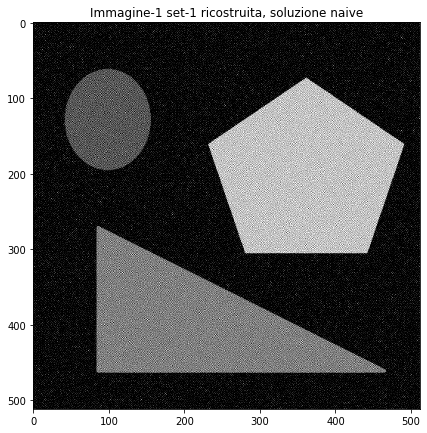

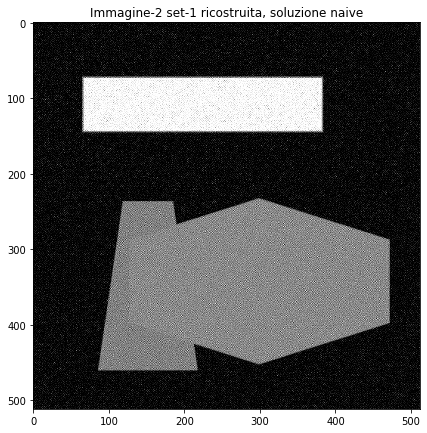

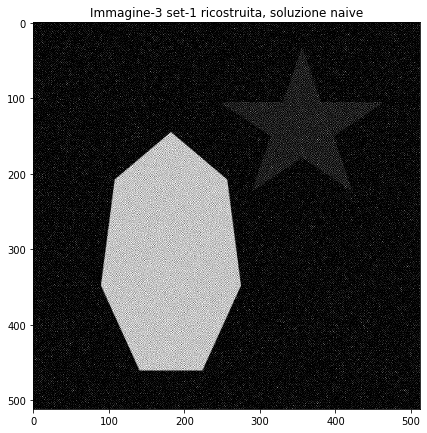

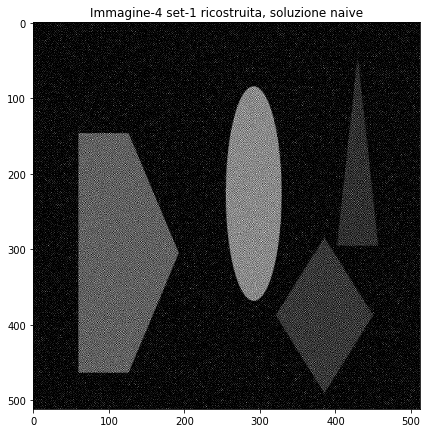

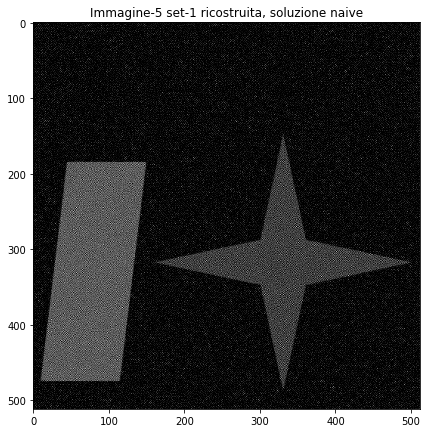

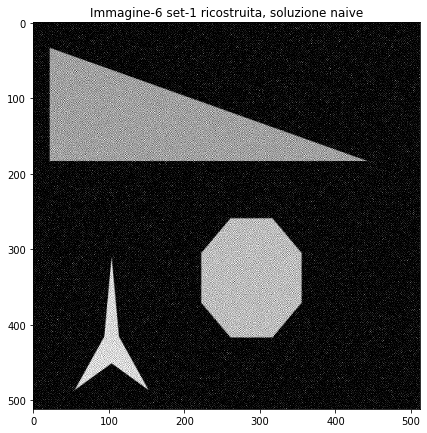

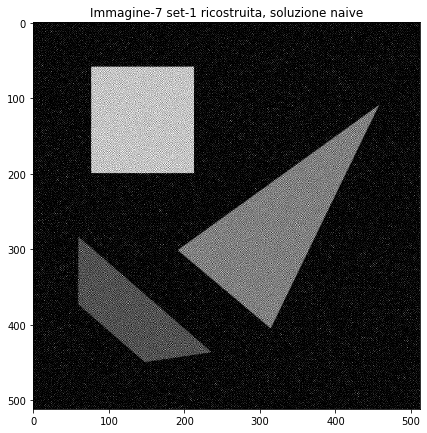

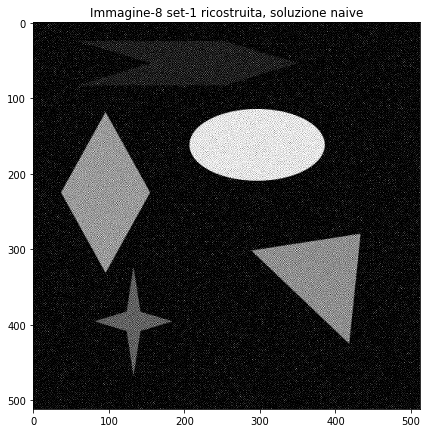

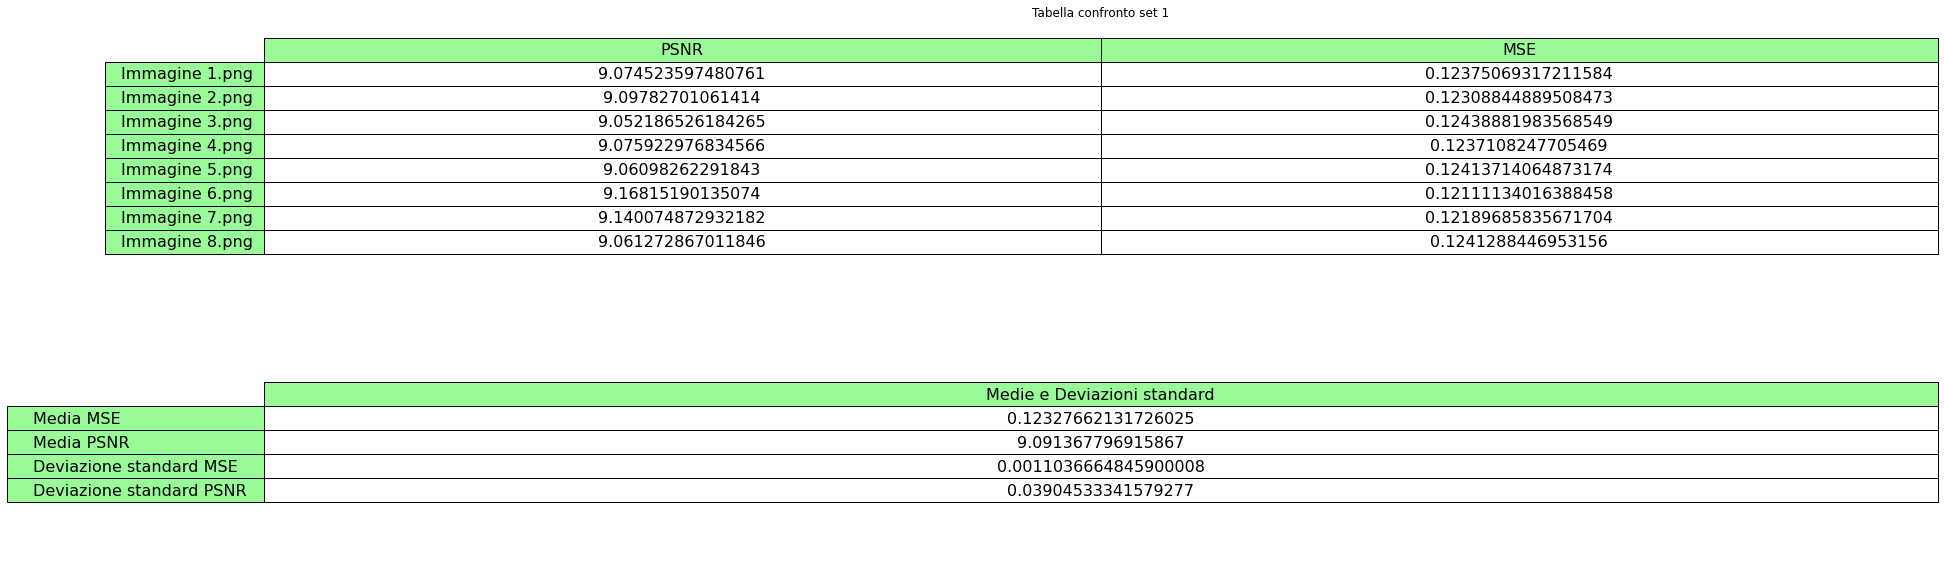

In [7]:
from scipy.optimize import minimize
#filtro di blur attualmente utilizzato, cambiare questo per cambiare la A a seconda del blur che si vuole usare
blur = f1

if np.array_equal(blur, f3):
  set_number = 3
  
elif np.array_equal(blur, f2):
  set_number = 2

elif np.array_equal(blur, f1):
  set_number = 1
  
else:
  set_number = 99

#ignoro il rumore

def f(x):
  x_matrix = x.reshape((immagini[0].shape[0], immagini[0].shape[1]))
  #print(0.5*np.linalg.norm(A(x_matrix,blur) - b))
  r = 0.5*(np.linalg.norm(A(x_matrix, blur) - b)**2)
  return np.sum(r)

def grad_f(x):
  x_matrix = x.reshape(immagini[0].shape[0], immagini[0].shape[0])  #formo la matrice
  r = AT(A(x_matrix,blur) - b, blur)
  r = r.reshape(r.shape[0]**2)
  return r

data_naive = []
data2 = []
MSE_naive = []
PSNR_naive = []
sum_MSE = 0
sum_PSNR = 0

for i in range(8):
  b=imblur1[i]
  x0 = np.zeros(immagini[0].shape[0]**2)

  res = minimize(f, x0, method='CG', jac=grad_f, options={'disp':True,  'maxiter':50})

  print(res)

  x = res.x.reshape((512,512))  
  
  PSNR_naive.append(metrics.peak_signal_noise_ratio(immagini[i], x))
  MSE_naive.append(metrics.mean_squared_error(immagini[i], x))
  print('PSNR immagine-{} con imblur{}: {}'.format(i, set_number, PSNR_naive[i]))
  print('MSE immagine-{} con imblur{}: {}'.format(i, set_number, MSE_naive[i]))
  data_naive.append([PSNR_naive[i], MSE_naive[i]])

  sum_MSE = MSE_naive[i] + sum_MSE
  sum_PSNR = PSNR_naive[i] + sum_PSNR

  #stampa e salva immagini
  plt.figure(figsize=(pixel2inch(512,72),pixel2inch(512,72))) #72dpi
  ax = plt.subplot()
  ax.imshow(x, cmap='gray', vmin=0, vmax=1)
  plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive'.format(set_number))
  plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive.png'.format(set_number),x, cmap=plt.cm.gray, vmin=0, vmax=1)
  files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive.png'.format(set_number))

media_MSE_naive = sum_MSE / 8
media_PSNR_naive = sum_PSNR / 8
dev_MSE_naive = np.std(MSE_naive)
dev_PSNR_naive = np.std(PSNR_naive)
data2.append([media_MSE_naive])
data2.append([media_PSNR_naive])
data2.append([dev_MSE_naive])
data2.append([dev_PSNR_naive])
headers=["PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data_naive,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", "Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()

## 3) Regolarizzazione
Per ridurre gli effetti del rumore nella ricostruzione è necessario introdurre un termine di regolarizzazione di Tikhonov. Si considera quindi il seguente problema di ottimizzazione.
\begin{align*}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2 + \frac{\lambda}{2} ||x||_2^2
\end{align*}

La funzione $f$ da minimizzare diventa
$f(x) = \frac{1}{2} ||Ax - b||_2^2 + \frac{\lambda}{2} ||x||_2^2$
il cui gradiente $\nabla f$ è dato da
$\nabla f(x) = A^TAx - A^Tb + λx$.

Utilizzando il metodo del gradiente coniugato implementato dalla funzione `minimize` ed il metodo del gradiente implementato a lezione, calcolare la soluzione del precendente problema di minimo regolarizzato per differenti valori di $\lambda$. 

In [8]:
#backtrackng
def next_step(x,grad): # backtracking procedure for the choice of the steplength
    alpha=1.1 
    rho = 0.5 #parametro con cui divido alpha dopo ogni iterazione
    c1 = 0.25 #parametro fisso
    p=-grad
    j=0
    jmax=10
    while (((f(x+alpha*p)).all() > (f(x)+c1*alpha*grad.T@p).all()) and j<jmax ): #condizioni di wolfe per la ricerca in linea inesatta
      alpha= rho*alpha
      j+=1
    if (j>jmax):
      return -1
    else:
      #print('alpha=',alpha)
      return alpha

In [9]:
#altra iterazione per gradient_minimize
def grad_minimize(x0, b, im, step, MAXITERATION, ABSOLUTE_STOP):
  #declare x_k and gradient_k vectors

  norm_grad_list=np.zeros((1,MAXITERATION+1))
  function_eval_list=np.zeros((1,MAXITERATION+1))
  error_list= []
  x_array = []
  
  #initialize first values
  x_last = x0.reshape((immagini[0].shape[0], immagini[0].shape[1]))


  k=0

  function_eval_list[:,k]=f(x_last)
  error_list.append(np.linalg.norm(x_last - im, 'fro') / np.linalg.norm(im, 'fro'))
  #error_list.append(np.linalg.norm(x_last - b))
  norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))
  x_array.append(x_last)

  while (np.linalg.norm(grad_f(x_last))>ABSOLUTE_STOP and k < MAXITERATION ):
    k=k+1
    grad = grad_f(x_last).reshape(immagini[0].shape[0], immagini[0].shape[1]) #direction is given by gradient of the last iteration

    # backtracking step
    step = next_step(x_last,grad)
    # Fixed step
    #step = 0.1
    
    if(step==-1):
      print('non convergente')
      return (k) #no convergence (iteration)

    x_last=x_last-step*grad

    function_eval_list[:,k]=f(x_last)
    error_list.append(np.linalg.norm(x_last-im, 'fro') / np.linalg.norm(im, 'fro'))
    #error_list.append(np.linalg.norm(x_last - b))
    norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))
    x_array.append(x_last)

  function_eval_list = function_eval_list[:,:k+1]
  #error_list = error_list[:,:k+1]
  norm_grad_list = norm_grad_list[:,:k+1]
  
  print('iterations=',k)
  #print('last guess: x=(%f)'%(x[0,k]))

  return (x_last,norm_grad_list, function_eval_list, error_list, x_array, k)


In [10]:
lam=0.8

def f(x):
  if x.shape != immagini[0].shape:
    x_matrix = x.reshape((immagini[0].shape[0], immagini[0].shape[1]))
  else:
    x_matrix = x
  r = 0.5*(np.linalg.norm(A(x_matrix, blur) - b)**2) + ((lam/2)*np.linalg.norm(x_matrix)**2)
  return np.sum(r)

def grad_f(x):
  if x.shape != immagini[0].shape:
    x_matrix = x.reshape(immagini[0].shape[0], immagini[0].shape[0])  #formo la matrice
  else:
    x_matrix = x
  r = AT(A(x_matrix,blur), blur) - AT(b, blur) + lam*x_matrix
  r = r.reshape(r.shape[0]**2)
  return r

Optimization terminated successfully.
         Current function value: 7993.945009
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([0.00407567, 0.00499664, 0.00017657, ..., 0.01018046, 0.01030327,
       0.00376464]), array([ 0.00465324,  0.00692885, -0.0002734 , ...,  0.01356474,
        0.01402785,  0.00362731]), array([ 0.00381593,  0.00753243, -0.00117051, ...,  0.01414288,
        0.01533769,  0.00215709]), array([ 0.00330357,  0.00719345, -0.00172379, ...,  0.01339226,
        0.01522692,  0.00179312]), array([ 0.00327935,  0.00700962, -0.0019295 , ...,  0.01304692,
        0.01521137,  0.00195654]), array([ 0.00339342,  0.00706954, -0.0018436 , ...,  0.01316463,
        0.01525184,  0.00205411]), array([ 0.00345655,  0.00714733, -0.00172105, ...,  0.01331935,
        0.01524555,  0.00204953]), array([ 0.00345993,  0.00715201, -0.00169531, ...,  0.01334257,
        0.01522808,  0.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 9472.570474
         Iterations: 10
         Function evaluations: 20
         Gradient evaluations: 20
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.00808371,  0.00840615,  0.00883363, ..., -0.00437121,
        0.00452696,  0.00658983]), array([ 0.01217534,  0.01230665,  0.01342178, ..., -0.0061472 ,
        0.00872089,  0.01109094]), array([ 0.0132469 ,  0.01292058,  0.01515914, ..., -0.0062611 ,
        0.01275317,  0.01412223]), array([ 0.01235059,  0.011926  ,  0.0148205 , ..., -0.0059081 ,
        0.01369788,  0.01432318]), array([ 0.01208799,  0.01168697,  0.01471194, ..., -0.00585002,
        0.01364862,  0.01413863]), array([ 0.01233672,  0.01196745,  0.01482364, ..., -0.00595024,
        0.01333747,  0.01401915]), array([ 0.01238471,  0.01201649,  0.01479336, ..., -0.00595875,
        0.01321547,  0.01396621]), array([ 0.01238594,  0.0120184 ,  0.01478895, ..., -0.00596009,
        0.01320831,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 5863.382510
         Iterations: 11
         Function evaluations: 21
         Gradient evaluations: 21
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([0.01430608, 0.01013498, 0.00156184, ..., 0.00373728, 0.00271801,
       0.00396623]), array([0.01841773, 0.01278195, 0.00167289, ..., 0.00365963, 0.00198286,
       0.0024608 ]), array([0.01968012, 0.0132683 , 0.0013611 , ..., 0.00283867, 0.00125554,
       0.0002203 ]), array([ 0.01913885,  0.01274961,  0.00125665, ...,  0.00245999,
        0.00150908, -0.00031339]), array([ 1.89500911e-02,  1.26511473e-02,  1.32111416e-03, ...,
        2.48120584e-03,  1.78515658e-03, -9.52746792e-05]), array([1.90985391e-02, 1.27984843e-02, 1.34270175e-03, ...,
       2.58454291e-03, 1.70074357e-03, 4.88048276e-05]), array([1.91209945e-02, 1.28177688e-02, 1.33737437e-03, ...,
       2.60555951e-03, 1.65609252e-03, 5.98931179e-05]), array([1.90943399e-02, 1.27902955e-02, 1.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 2412.117525
         Iterations: 8
         Function evaluations: 20
         Gradient evaluations: 20
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([0.00920059, 0.00635422, 0.0091749 , ..., 0.0157214 , 0.01478861,
       0.00156284]), array([0.0176588 , 0.01131929, 0.01560147, ..., 0.02362244, 0.02351039,
       0.00191003]), array([0.01943869, 0.01177432, 0.01562123, ..., 0.02369188, 0.02395888,
       0.00157297]), array([0.01888287, 0.01114017, 0.01434425, ..., 0.02216868, 0.02237249,
       0.00121497]), array([0.018825  , 0.01111518, 0.01429297, ..., 0.02210598, 0.02227372,
       0.00118509]), array([0.0188465 , 0.01122401, 0.01451971, ..., 0.02237643, 0.02248984,
       0.00122069]), array([0.01884231, 0.0112271 , 0.01454726, ..., 0.02241592, 0.02253235,
       0.00123541]), array([0.01884152, 0.01122555, 0.01454939, ..., 0.02241914, 0.02253958,
       0.00124107])]
     fun: 2412.117525279905
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 1311.334361
         Iterations: 8
         Function evaluations: 17
         Gradient evaluations: 17
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([-0.00012136, -0.00467005, -0.01021824, ...,  0.02247086,
        0.01434267,  0.00934297]), array([-0.00261517, -0.00788288, -0.01839694, ...,  0.03216319,
        0.0167238 ,  0.01007128]), array([-0.00273571, -0.00721804, -0.01887349, ...,  0.03260797,
        0.01609461,  0.01012949]), array([-0.00249323, -0.00658282, -0.01809824, ...,  0.03172273,
        0.01590452,  0.01047474]), array([-0.00250678, -0.00659899, -0.01807571, ...,  0.03166946,
        0.01594587,  0.01052049]), array([-0.00256517, -0.00673288, -0.01819717, ...,  0.0317837 ,
        0.01600779,  0.01047989]), array([-0.00256496, -0.00673406, -0.01819836, ...,  0.03178893,
        0.01599543,  0.0104588 ]), array([-0.00256337, -0.00673366, -0.01819926, ...,  0.03179263,
        0.01599431, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 5526.329723
         Iterations: 10
         Function evaluations: 22
         Gradient evaluations: 22
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([-0.00901733, -0.00604602, -0.01285132, ..., -0.00537896,
        0.00943905,  0.00147228]), array([-0.01803103, -0.01118336, -0.02333388, ..., -0.01213891,
        0.01738743,  0.00220965]), array([-0.01941013, -0.01141105, -0.02472399, ..., -0.0133684 ,
        0.01979451,  0.00285847]), array([-0.01818419, -0.0102091 , -0.02312853, ..., -0.01267234,
        0.01966167,  0.00310996]), array([-0.01777408, -0.00989522, -0.02264835, ..., -0.01247723,
        0.01926205,  0.00294535]), array([-0.01775371, -0.00988744, -0.02262706, ..., -0.01246736,
        0.019223  ,  0.00292719]), array([-0.01780827, -0.00995876, -0.02270097, ..., -0.01249035,
        0.01920927,  0.00291519]), array([-0.0178231 , -0.00998071, -0.02272346, ..., -0.01248947,
        0.01921632,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 4348.738086
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([-0.00508398, -0.01154842, -0.01309618, ..., -0.0110857 ,
        0.00048773,  0.00395917]), array([-0.0063471 , -0.0169183 , -0.02049167, ..., -0.01635566,
        0.00288332,  0.00823033]), array([-0.00598523, -0.01674623, -0.02091326, ..., -0.01727243,
        0.00309639,  0.00878759]), array([-0.00554074, -0.01558629, -0.0197242 , ..., -0.01681812,
        0.00268529,  0.00823264]), array([-0.0055105 , -0.01542651, -0.01955267, ..., -0.01669749,
        0.00255614,  0.00807284]), array([-0.00551407, -0.01542427, -0.01955005, ..., -0.01667272,
        0.00254139,  0.00805206]), array([-0.0055222 , -0.01545296, -0.01957919, ..., -0.01668188,
        0.00255552,  0.00806849]), array([-0.0055258 , -0.01546692, -0.01959134, ..., -0.01668941,
        0.00256353,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 4362.260226
         Iterations: 10
         Function evaluations: 23
         Gradient evaluations: 23
 allvecs: [array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.00316472, -0.00064041,  0.00356069, ...,  0.00579036,
        0.01281549,  0.00100234]), array([ 0.00449758, -0.0040048 ,  0.00440085, ...,  0.00526111,
        0.0202694 , -0.00044142]), array([ 0.00501398, -0.00506849,  0.00450979, ...,  0.00438367,
        0.02188333, -0.00057065]), array([ 0.0050964 , -0.00501599,  0.00453083, ...,  0.00415564,
        0.02154237, -0.00034203]), array([ 0.00514414, -0.00492417,  0.00462906, ...,  0.00418589,
        0.02128723, -0.00017908]), array([ 0.00513538, -0.00491093,  0.00464453, ...,  0.00424033,
        0.02123625, -0.00018548]), array([ 0.00511905, -0.00492024,  0.00462844, ...,  0.00427193,
        0.02123613, -0.00022637]), array([ 0.0051203 , -0.00492231,  0.00461593, ...,  0.00426031,
        0.02123304,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

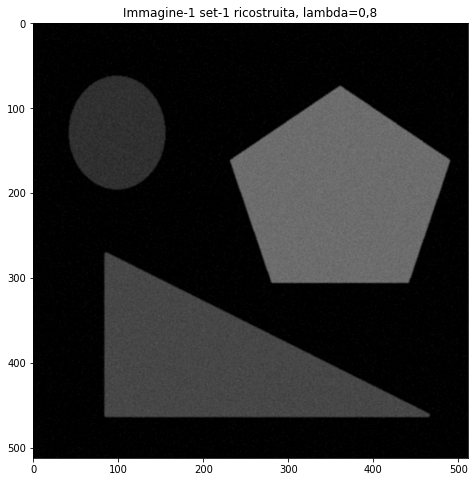

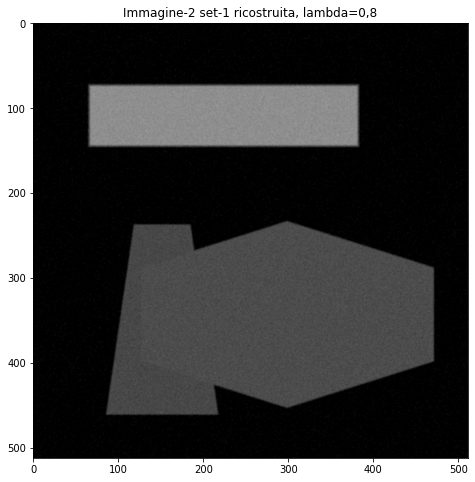

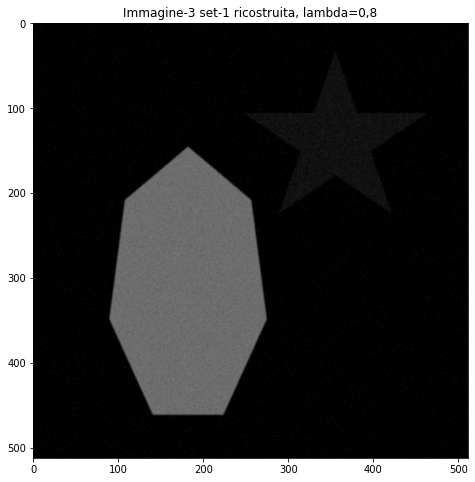

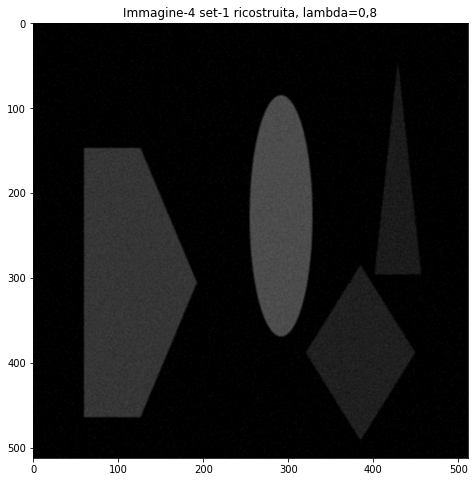

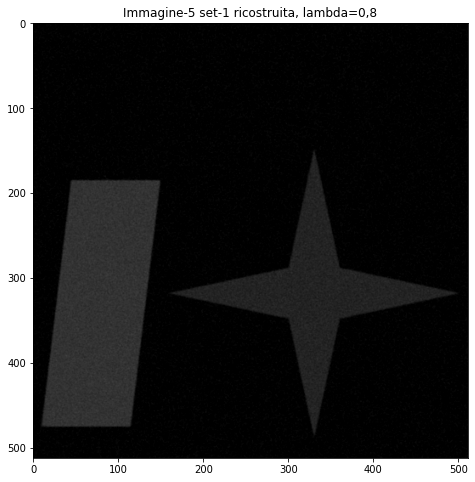

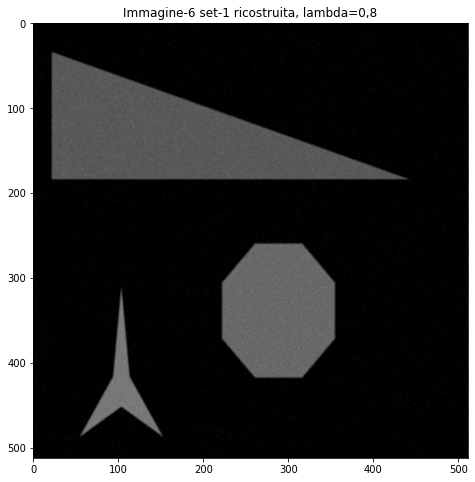

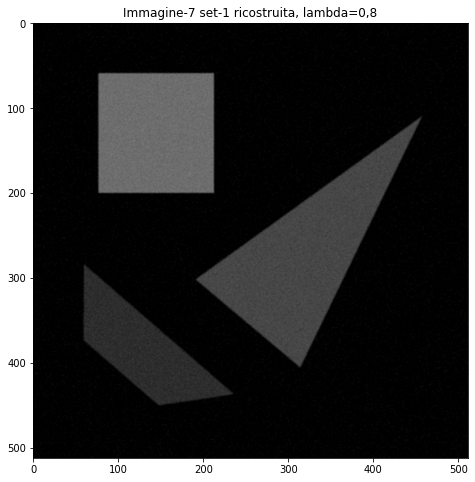

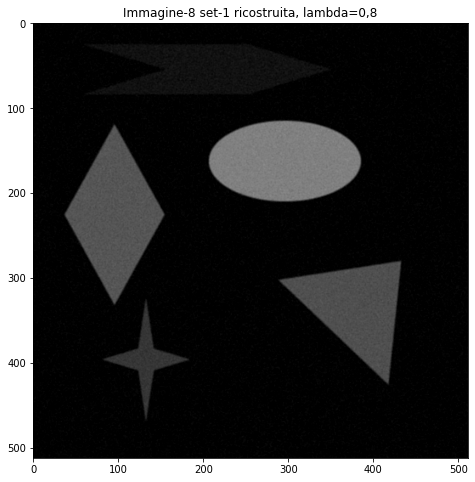

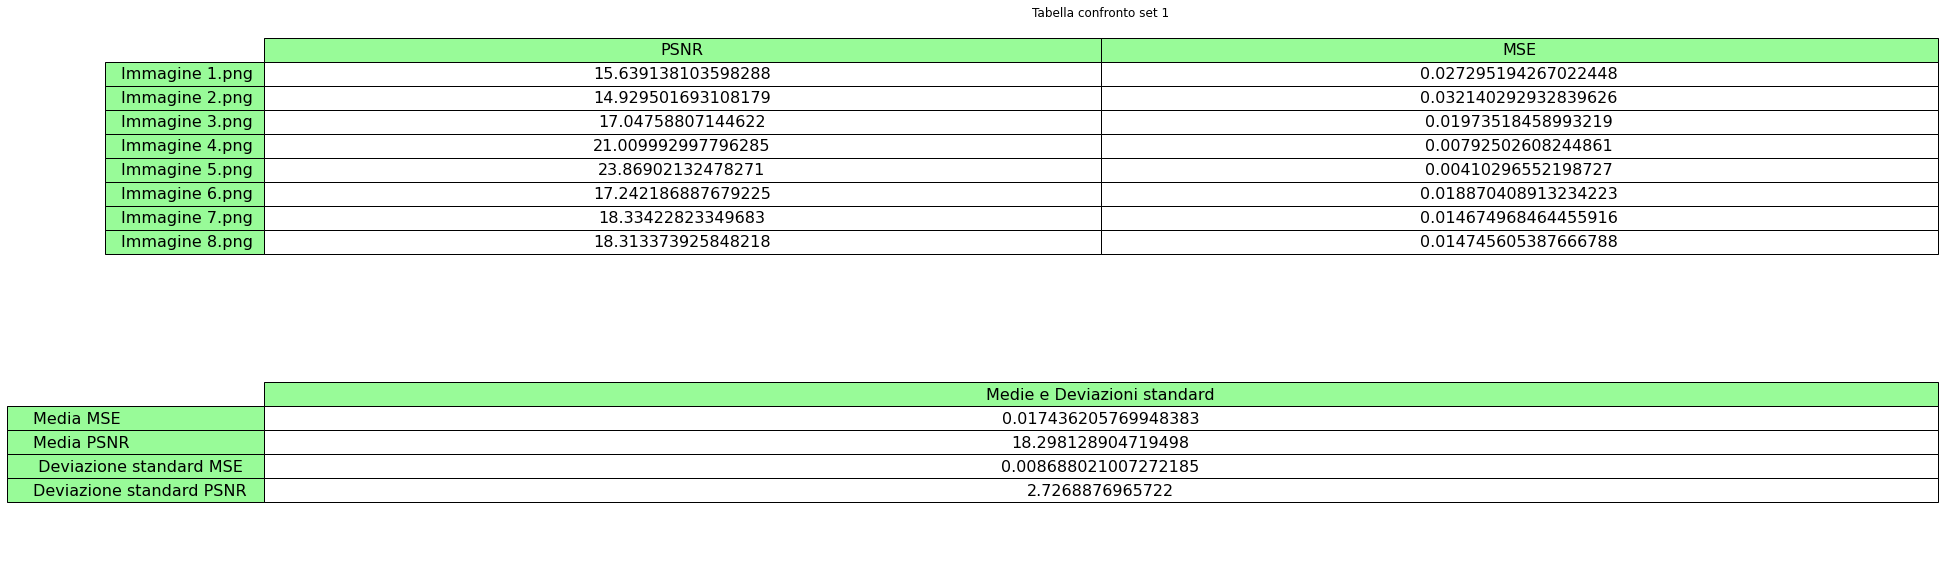

iterations= 50
[[ 3.25399308e-03  6.95596597e-03 -1.87575114e-03 ...  1.10793357e-04
   1.76626922e-03  3.30836180e-03]
 [ 1.63097628e-03  1.42507254e-02 -6.40742265e-03 ... -1.11956892e-02
   3.44984026e-03  2.00461019e-02]
 [-8.90977758e-03  1.18897347e-02 -8.29888344e-03 ... -1.10054922e-02
   3.45980802e-03  1.72199492e-02]
 ...
 [-5.69745035e-03  8.90706145e-03 -4.77684701e-03 ...  2.46935245e-02
   1.45585529e-02 -6.88227604e-03]
 [ 1.45345674e-03 -4.94658597e-05 -2.04270896e-02 ...  2.69980292e-02
   2.72839216e-02 -2.76482889e-03]
 [ 9.46410131e-03  1.39915967e-02  1.06000913e-02 ...  1.31536320e-02
   1.50342807e-02  1.84897360e-03]]
PSNR immagine-0 con imblur1: 12.592372952965212
MSE immagine-0 con imblur1: 0.05505068213546684


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[ 1.21310180e-02  1.17385750e-02  1.44893869e-02 ... -1.43232769e-02
  -1.08295495e-02  1.47896022e-02]
 [ 1.27068445e-02  1.46674505e-02  6.59877789e-03 ... -2.09167798e-02
  -2.09380933e-02  6.88135282e-03]
 [-2.04137985e-03  9.59740742e-03  1.01892298e-02 ... -1.07447205e-02
   3.49119283e-03 -8.94070035e-04]
 ...
 [-9.16499140e-03 -9.76629929e-03 -3.49223679e-02 ...  1.87579699e-02
  -8.99574148e-05 -1.44964614e-02]
 [-5.50422177e-03 -1.81248132e-02 -1.85788006e-02 ... -5.24331354e-03
  -3.31766942e-03 -3.90417699e-03]
 [ 6.52989944e-03  1.61370656e-02  1.48801369e-02 ... -6.13614451e-03
   1.30435241e-02  1.37768557e-02]]
PSNR immagine-1 con imblur1: 11.878396683106791
MSE immagine-1 con imblur1: 0.06488739389018275


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[ 0.0191943   0.01287934  0.00140517 ...  0.00319109  0.01037504
   0.02048771]
 [ 0.01680754  0.01413892 -0.00235363 ... -0.00074575 -0.00399901
   0.01249925]
 [-0.02053554 -0.00453218 -0.01576074 ... -0.01826354 -0.00755909
  -0.0135035 ]
 ...
 [ 0.01891937 -0.00580099 -0.02305867 ... -0.00270844 -0.00723442
   0.00363497]
 [ 0.01773237  0.01217941  0.01635643 ...  0.00101568 -0.01378047
   0.00855507]
 [ 0.01095117  0.01322078  0.00465111 ...  0.00269008  0.00174797
   0.00012469]]
PSNR immagine-2 con imblur1: 13.968709790539508
MSE immagine-2 con imblur1: 0.040098582548758505


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[ 0.01908885  0.01152315  0.01489377 ...  0.00155666  0.01544496
   0.01126224]
 [-0.010837   -0.00510389  0.01745819 ... -0.03539547 -0.01488714
  -0.00935524]
 [ 0.00320097 -0.0048344  -0.01325542 ... -0.00683179  0.00178817
  -0.00011225]
 ...
 [-0.00689155 -0.00414263  0.00373325 ... -0.00062759 -0.00041108
  -0.01058208]
 [-0.02776001 -0.02016235  0.00149098 ...  0.01446864  0.0104869
  -0.00701846]
 [-0.01158635 -0.01553905  0.00553371 ...  0.02251228  0.02268977
   0.00144683]]
PSNR immagine-3 con imblur1: 18.07655791861146
MSE immagine-3 con imblur1: 0.015571993298281447


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[-0.00314597 -0.00732031 -0.01878612 ...  0.00834387  0.00571914
   0.01588692]
 [ 0.00511044  0.00927027 -0.00411798 ... -0.01719925  0.00673437
   0.01854908]
 [-0.00697355 -0.00878409 -0.01641379 ... -0.0014651   0.01904018
   0.00739611]
 ...
 [ 0.02710677  0.01512995  0.01729032 ...  0.02300117  0.01485945
   0.03478877]
 [ 0.00504173 -0.00027257  0.02437917 ...  0.02004195  0.00342328
   0.00937258]
 [-0.01272063 -0.0107092  -0.00264356 ...  0.0312798   0.01546747
   0.00991777]]
PSNR immagine-4 con imblur1: 20.97978379371058
MSE immagine-4 con imblur1: 0.007980344150960215


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[-0.01825133 -0.01043012 -0.02318926 ... -0.0227555   0.00388379
   0.00331129]
 [-0.00056103  0.01797037  0.00767439 ... -0.00452714  0.0076127
   0.00142773]
 [ 0.01827879  0.02937169  0.01296375 ...  0.00517759  0.0202913
   0.02031542]
 ...
 [ 0.00759264  0.01635801 -0.00277104 ... -0.00456847 -0.0103294
  -0.01545188]
 [ 0.00670492  0.02605264  0.01995629 ...  0.00586001  0.00496386
  -0.00850188]
 [-0.01337543 -0.00170148 -0.00981921 ... -0.01283664  0.01883882
   0.00251198]]
PSNR immagine-5 con imblur1: 14.330792363211874
MSE immagine-5 con imblur1: 0.03689102853487711


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[-0.0052178  -0.01517083 -0.0193091  ... -0.00106107  0.02561269
   0.01207045]
 [-0.02543301 -0.01328915 -0.00525997 ... -0.01374752 -0.00783067
  -0.01571965]
 [ 0.01267154 -0.00534214 -0.0009549  ...  0.00591619 -0.00345752
   0.01355691]
 ...
 [ 0.01630913  0.01559407  0.01852654 ...  0.0106025  -0.00066216
  -0.00330308]
 [ 0.0031724   0.01039678  0.01314655 ... -0.0020552  -0.01436211
  -0.01558144]
 [ 0.00413737 -0.00565449 -0.00885525 ... -0.01638474  0.00286317
   0.0083679 ]]
PSNR immagine-6 con imblur1: 15.366955961684994
MSE immagine-6 con imblur1: 0.02906058843122707


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 50
[[ 0.00511292 -0.00493445  0.00459876 ...  0.00134771 -0.00586546
  -0.00514229]
 [ 0.01197918  0.01631148  0.01410312 ...  0.02240697 -0.00413513
   0.00651145]
 [-0.01421162  0.00229235  0.01002455 ... -0.01682131 -0.00950149
   0.00863719]
 ...
 [-0.00448934  0.0110227  -0.00841986 ...  0.01353098  0.00249843
  -0.01572211]
 [-0.00390227  0.01685161  0.00603956 ...  0.00471852  0.01864119
   0.00410004]
 [-0.01309988  0.00215989 -0.00364715 ...  0.00426999  0.02123388
  -0.00024188]]
PSNR immagine-7 con imblur1: 15.39860523660886
MSE immagine-7 con imblur1: 0.028849578762969345


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

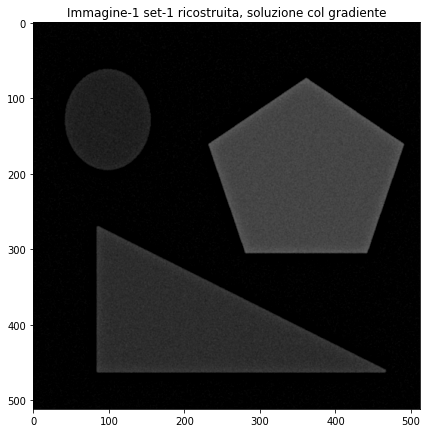

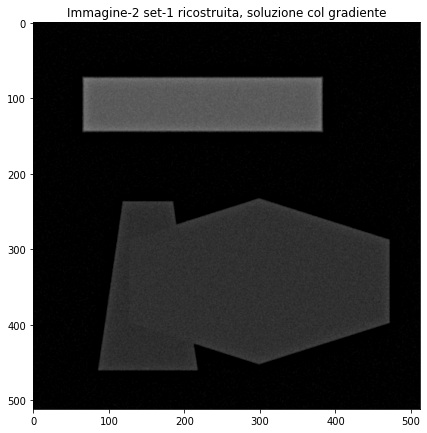

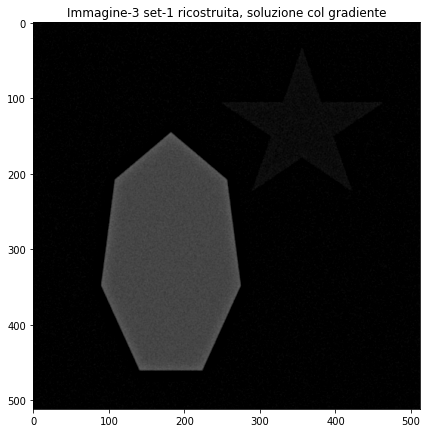

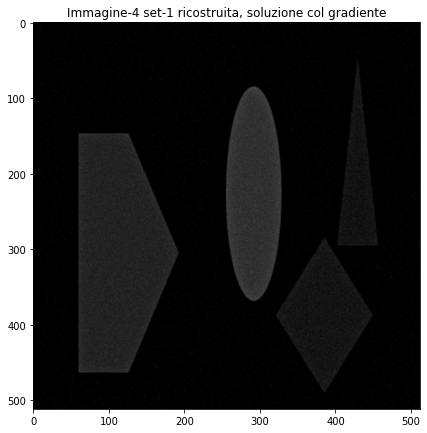

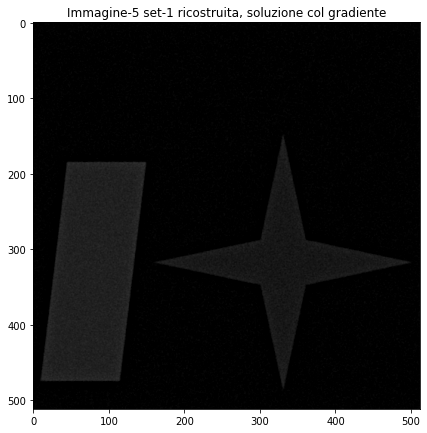

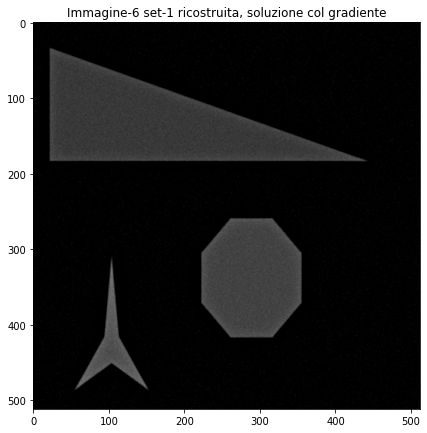

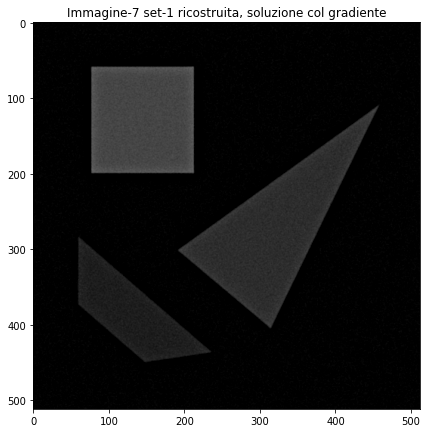

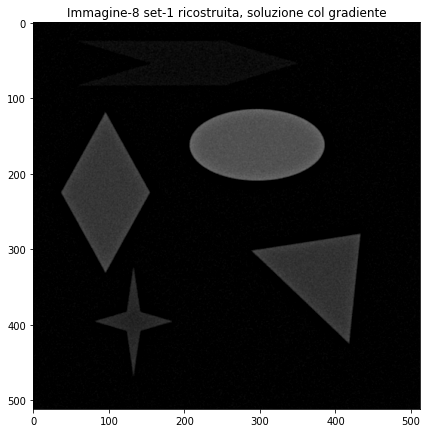

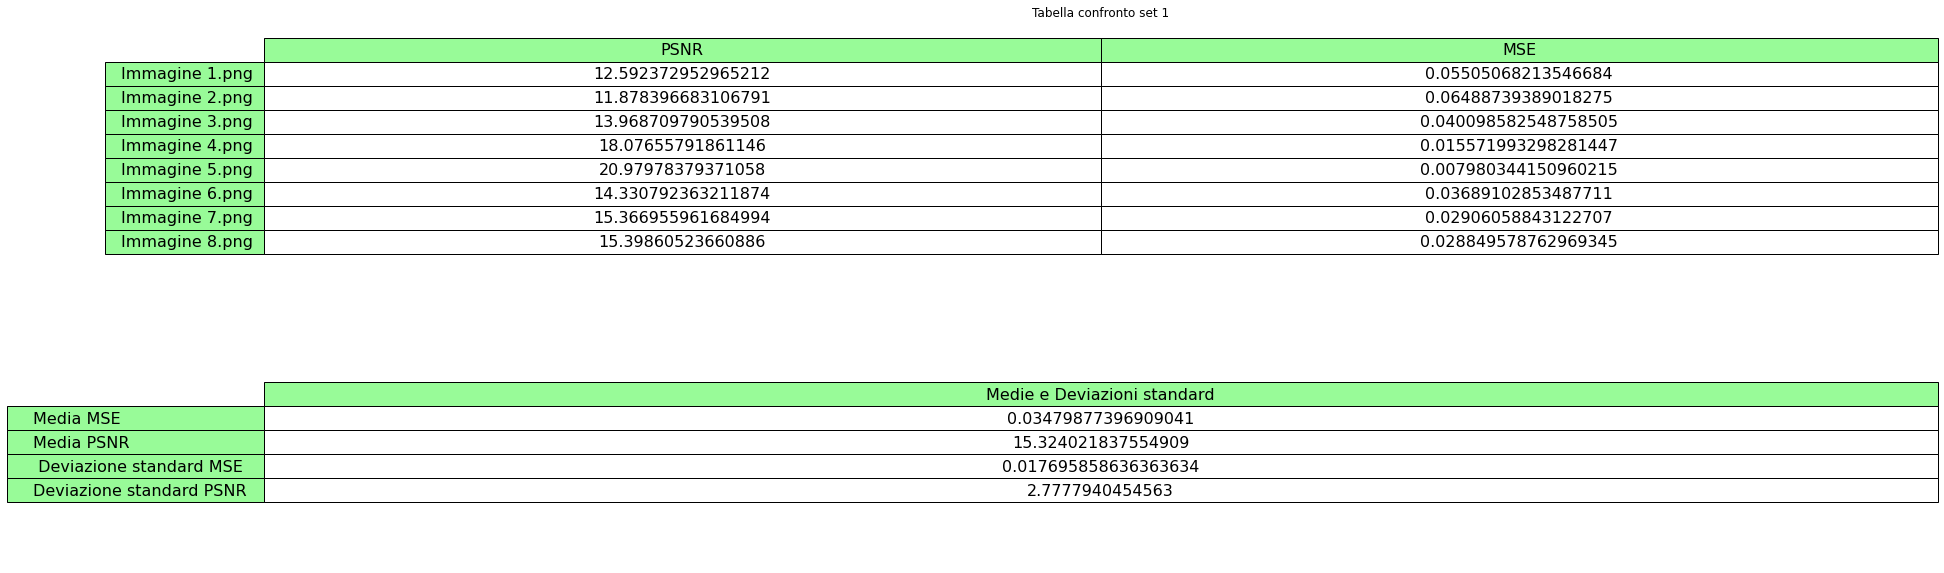

In [27]:
#metodo del gradiente coniugato
lambda_value = str(lam).replace('.', ',')

data_CG = []
data2 = []
MSE_CG = []
PSNR_CG = []
sum_MSE = 0
sum_PSNR = 0

for i in range(8):
  b=imblur1[i] #cambiare anche il filtro del blur corrispondente
  x0 = np.zeros(immagini[0].shape[0]**2)

  reg =  minimize(f, x0, method='CG', jac=grad_f, options={'disp':True, 'maxiter':50, 'return_all':True})

  print(reg)

  x = reg.x.reshape((512,512))
  #calcolo l'errore relativo per ogni iterazione

  relative_error_CG = []
  for j in range(len(reg.allvecs)):
    relative_error_CG.append(np.linalg.norm(reg.allvecs[j].reshape(512,512) - immagini[i])/(np.linalg.norm(immagini[i])))

  PSNR_CG.append(metrics.peak_signal_noise_ratio(immagini[i], x))
  MSE_CG.append(metrics.mean_squared_error(immagini[i], x))
  print('PSNR immagine-{} con imblur{}: {}'.format(i, set_number, PSNR_CG[i]))
  print('MSE immagine-{} con imblur{}: {}'.format(i, set_number, MSE_CG[i]))
  data_CG.append([PSNR_CG[i], MSE_CG[i]])
  plt.figure(figsize=(8,8))
  ax = plt.subplot()
  ax.imshow(x, cmap='gray', vmin=0, vmax=1)
  plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, lambda={}'.format(set_number, lambda_value))
  plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, lambda={}.png'.format(set_number,lambda_value),x, cmap=plt.cm.gray, vmin=0, vmax=1)
  files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, lambda={}.png'.format(set_number, lambda_value))

  sum_MSE = MSE_CG[i] + sum_MSE
  sum_PSNR = PSNR_CG[i] + sum_PSNR

media_MSE_CG = sum_MSE / 8
media_PSNR_CG = sum_PSNR / 8
dev_MSE_CG = np.std(MSE_CG)
dev_PSNR_CG = np.std(PSNR_CG)
data2.append([media_MSE_CG])
data2.append([media_PSNR_CG])
data2.append([dev_MSE_CG])
data2.append([dev_PSNR_CG])
headers=["PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data_CG,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", " Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()


#soluzione con il metodo del gradiente
step=0.1
MAXITERATIONS=50
ABSOLUTE_STOP=1.e-5
mode='plot_history'
x0 = np.zeros(immagini[0].shape[0]**2)

data_gradient = []
data2 = []
MSE_gradiente = []
PSNR_gradiente = []
sum_MSE = 0
sum_PSNR = 0


for i in range(8):
  b = imblur1[i]
  im = immagini[i]
  (X, norm_grad_list, function_eval_list, error_list, x_array, k)  = grad_minimize(x0, b, im, step, MAXITERATIONS, ABSOLUTE_STOP)

  relative_error_gradient = []
  for j in range(0, len(x_array), 2):
    relative_error_gradient.append(np.linalg.norm(x_array[j] - immagini[i]) / np.linalg.norm(immagini[i]))
  print(X)
  
  PSNR_gradiente.append(metrics.peak_signal_noise_ratio(immagini[i], X))
  MSE_gradiente.append(metrics.mean_squared_error(immagini[i], X))
  print('PSNR immagine-{} con imblur{}: {}'.format(i, set_number, PSNR_gradiente[i]))
  print('MSE immagine-{} con imblur{}: {}'.format(i, set_number, MSE_gradiente[i]))
  data_gradient.append([PSNR_gradiente[i], MSE_gradiente[i]])

  plt.figure(figsize=(pixel2inch(512,72),pixel2inch(512,72))) #72dpi
  ax = plt.subplot()
  ax.imshow(X, cmap='gray', vmin=0, vmax=1)
  plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione col gradiente'.format(set_number))
  plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione col gradiente.png'.format(set_number),X, cmap=plt.cm.gray, vmin=0, vmax=1)
  files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione col gradiente.png'.format(set_number))

  sum_MSE = MSE_gradiente[i] + sum_MSE
  sum_PSNR = PSNR_gradiente[i] + sum_PSNR

media_MSE_gradiente = sum_MSE / 8
media_PSNR_gradiente = sum_PSNR / 8
dev_MSE_gradiente = np.std(MSE_gradiente)
dev_PSNR_gradiente = np.std(PSNR_gradiente)
data2.append([media_MSE_gradiente])
data2.append([media_PSNR_gradiente])
data2.append([dev_MSE_gradiente])
data2.append([dev_PSNR_gradiente])
headers=["PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data_gradient,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", " Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()

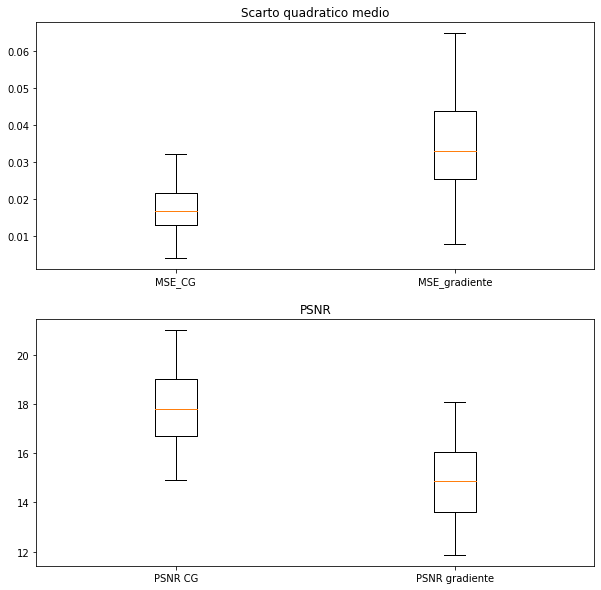

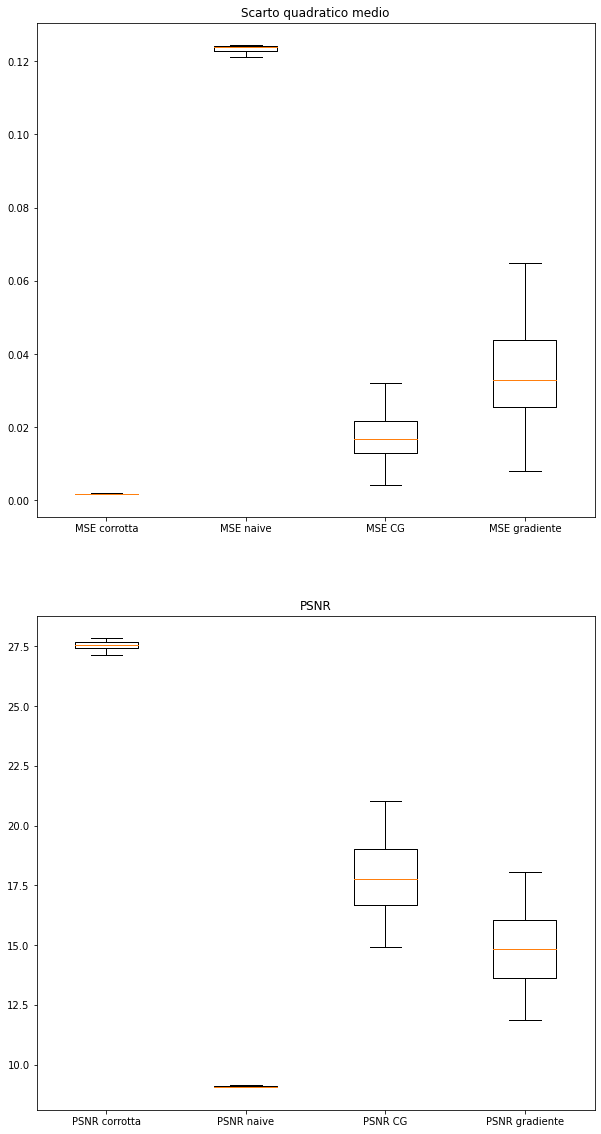

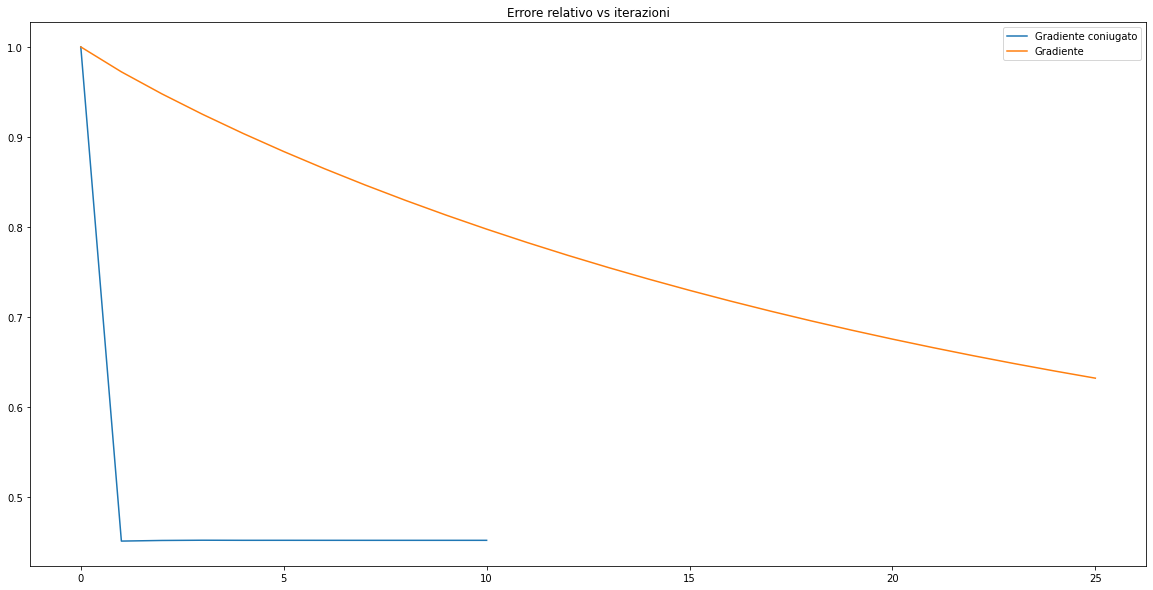

In [29]:
#medie_MSE = [MSE_corrotta, MSE_naive, MSE_CG, MSE_gradiente]
#medie_PSNR = [PSNR_corrotta, PSNR_naive, PSNR_CG, PSNR_gradiente]

medie_MSE = [MSE_CG, MSE_gradiente]
medie_PSNR = [PSNR_CG, PSNR_gradiente]

fig, (ax1, ax2) = plt.subplots(2, figsize= (10,10))
ax1.boxplot(medie_MSE, 0, "")
ax2.boxplot(medie_PSNR, 0, "")
ax1.xaxis.set_ticklabels(["MSE_CG", "MSE_gradiente"])
ax2.set_xticklabels(["PSNR CG", "PSNR gradiente"])
ax1.set_title("Scarto quadratico medio")
ax2.set_title("PSNR")
plt.show()

medie_complete_MSE = [MSE_corrotta, MSE_naive, MSE_CG, MSE_gradiente]
medie_complete_PSNR = [PSNR_corrotta, PSNR_naive, PSNR_CG, PSNR_gradiente]
fig, (ax3, ax4) = plt.subplots(2, figsize= (10,20))
ax3.boxplot(medie_complete_MSE, 0, "")
ax4.boxplot(medie_complete_PSNR, 0, "")
ax3.xaxis.set_ticklabels(["MSE corrotta", "MSE naive", "MSE CG", "MSE gradiente"])
ax4.set_xticklabels(["PSNR corrotta", "PSNR naive", "PSNR CG", "PSNR gradiente"])
ax3.set_title("Scarto quadratico medio")
ax4.set_title("PSNR")
plt.show()

fig2, axes = plt.subplots(figsize = (20,10))
axes.plot(range(reg.nit+1), relative_error_CG, label="Gradiente coniugato")
axes.plot(range(len(relative_error_gradient)), relative_error_gradient, label="Gradiente")
axes.set_title("Errore relativo vs iterazioni")
axes.legend()
plt.show()

## 4) Variazione Totale (Facoltativo) 

Un altra funzione adatta come termine di regolarizzazione è la Variazione Totale. Data $u$ immagine di dimensioni $m\times n$ la variazione totale $TV$ di $u$ è definit come:
\begin{align*}
  TV(u) = \sum_i^n{\sum_j^m{\sqrt{||\nabla u(i, j)||_2^2 + \epsilon^2}}}
\end{align*}
Per calcolare il gradiente dell'immagine $\nabla u$ usiamo la funzione `np.gradient` che approssima la derivata per ogni pixel calcolando la differenza tra pixel adiacenti. I risultati sono due immagini della stessa dimensione dell'immagine in input, una che rappresenta il valore della derivata orizzontale `dx` e l'altra della derivata verticale `dy`. Il gradiente dell'immagine nel punto $(i, j)$ è quindi un vettore di due componenti, uno orizzontale contenuto in `dx` e uno verticale in `dy`.

Come nei casi precedenti il problema di minimo che si va a risolvere è il seguente:
\begin{align*}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2 + \lambda TV(u)
\end{align*}
il cui gradiente $\nabla f$ è dato da
\begin{align*}
\nabla f(x) = (A^TAx - A^Tb)  + \lambda \nabla TV(x)
\end{align*}

Utilizzando il metodo del gradiente implementato a lezione, calcolare la soluzione del precendente problema di minimo regolarizzato per differenti valori di $\lambda$. 


---
Per risolvere il problema di minimo è necessario anche calcolare il gradiente della variazione totale che è definito nel modo seguente
\begin{align*}
  \nabla TV(u) = -div\left(\frac{\nabla u}{\sqrt{||\nabla u||_2^2 + \epsilon^2}}\right)
\end{align*}

\begin{align*}
  div(F) = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y}
\end{align*}

$div(F)$ è la divergenza del campo vettoriale $F$, nel nostro caso $F$ ha due componenti dati dal gradiente dell'immagine $\nabla u$ scalato per il valore $ \frac{1}{\sqrt{||\nabla u||_2^2 + \epsilon^2}}$. Per calcolare la divergenza bisogna calcolare la derivata orizzontale $\frac{\partial F_x}{\partial x}$ della componente $x$ di $F$ e sommarla alla derivata verticale $\frac{\partial F_y}{\partial y}$ della componente $y$ di $F$. Per specificare in quale direzione calcolare la derivata con la funzione `np.gradient` utilizziamo il parametro `axis = 0` per l'orizzontale e `axis = 1` per la verticale.

In [ ]:
eps = 1e-2

# Variazione totale
def totvar(x):
  # Calcola il gradiente di x
  dx, dy = np.gradient(x)
  n2 = np.square(dx) + np.square(dy)

  # Calcola la variazione totale di x
  tv = np.sqrt(n2 + eps**2).sum()
  return tv

# Gradiente della variazione totale
def grad_totvar(x):
  # Calcola il numeratore della frazione
  dx, dy = np.gradient(x)

  # Calcola il denominatore della frazione
  n2 = np.square(dx) + np.square(dy)
  den = np.sqrt(n2 + eps**2)

  # Calcola le due componenti di F dividendo il gradiente per il denominatore
  Fx = dx / den
  Fy = dy / den

  # Calcola la derivata orizzontale di Fx 
  dFdx = np.gradient(Fx, axis=0)
  
  # Calcola la derivata verticale di Fy
  dFdy = np.gradient(Fy, axis=1)

  # Calcola la divergenza 
  div = (dFdx + dFdy)

  # Restituisci il valore del gradiente della variazione totale
  return -div

# Relazione

1.   Riportare e commentare i risultati ottenuti nei punti 2. 3. (e 4.) su un immagine del set creato e su altre due immagini in bianco e nero  (fotografiche/mediche/astronomiche)
2.   Riportare delle tabelle con le misure di PSNR e MSE ottenute al variare dei parametri (dimensione kernel, valore di sigma, la deviazione standard del rumore, il parametro di regolarizzazione). 
3. Calcolare sull’intero set di immagini medie e deviazione standard delle metriche per alcuni valori fissati dei parametri.  
4. Analizzare su 2 esecuzioni le proprietà dei metodi numerici utilizzati (gradiente coniugato e gradiente) in termini di numero di iterazioni, andamento dell’errore, della funzione obiettivo, norma del gradiente. 

